In [118]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras

In [119]:
keras.backend.backend()

'tensorflow'

In [120]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [121]:
x_train.shape

(60000, 28, 28)

In [122]:
x_test.shape

(10000, 28, 28)

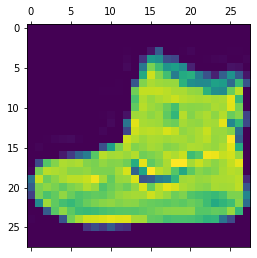

In [127]:
plt.matshow(x_train[0])

In [125]:
# What is the prediction of above image, check y_train data
y_train[0]

9

In [201]:
# before starting our neural network, normalize our dataset
x_train = x_train/255
x_test = x_test/255

In [202]:
# building a stack of neural network layer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten

In [203]:
model = Sequential()

In [217]:
model.add(Flatten(input_shape = [28,28])) # input layer , # Flatten is converting 2D array to 1D array
model.add(Dense(200, activation='relu')) # hidden layer
model.add(Dense(10, activation='softmax')) # output layer ( here we have only 10 images)

In [205]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 20)                15700     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                210       
Total params: 15,910
Trainable params: 15,910
Non-trainable params: 0
_________________________________________________________________


In [218]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [219]:
model.fit(x_train, y_train, epochs=5) # train the neural network, epochs=5 is 5 iterations

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 7s 111us/sample - loss: 0.6709 - accuracy: 0.7734
Epoch 2/5
60000/60000 [==============================] - 6s 104us/sample - loss: 0.4044 - accuracy: 0.8708
Epoch 3/5
60000/60000 [==============================] - 6s 94us/sample - loss: 0.3780 - accuracy: 0.8773
Epoch 4/5
60000/60000 [==============================] - 6s 93us/sample - loss: 0.3643 - accuracy: 0.8789
Epoch 5/5
60000/60000 [==============================] - 6s 97us/sample - loss: 0.3529 - accuracy: 0.8808


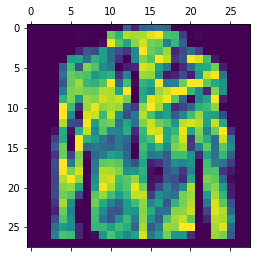

In [212]:
plt.matshow(x_test[17])

In [220]:
yp = model.predict(x_test)

In [213]:
yp[17]

array([3.29450406e-02, 5.14407147e-05, 6.26380801e-01, 2.59567547e-04,
       2.30985671e-01, 2.07103703e-08, 1.06491886e-01, 5.76139570e-12,
       2.88540288e-03, 1.80051799e-07], dtype=float32)

In [214]:
np.argmax(yp[17])

2

In [222]:
model.evaluate(x_test,y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.4032722829461098, 0.8656]